In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('test.csv')

In [195]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [196]:
train = train.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
test = test.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)


In [197]:
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0


In [198]:
train.shape

(891, 5)

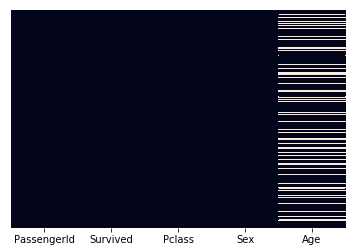

In [203]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

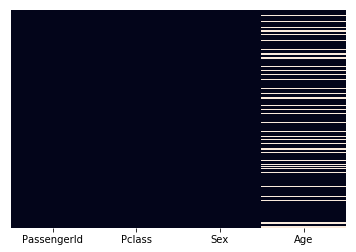

In [202]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=)

In [142]:
train['Age'] = train['Age'].fillna(0)
test['Age'] = test['Age'].fillna(0)


/home/ashmita/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


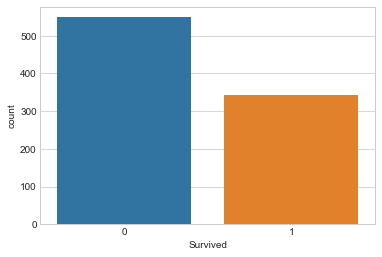

In [204]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

/home/ashmita/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


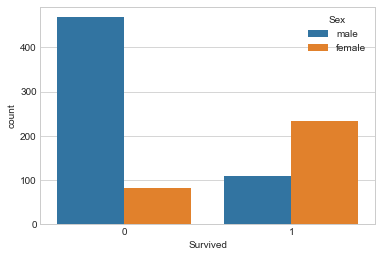

In [206]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

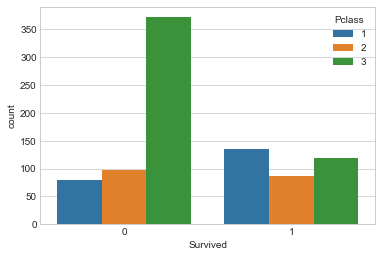

In [207]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

In [144]:
sex = pd.get_dummies(train['Sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [145]:
sex1 = pd.get_dummies(test['Sex'])
sex1.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [146]:
train = train.drop(['Sex'],axis=1)
test = test.drop(['Sex'],axis=1)

In [147]:
train.head(3)

,PassengerId,Survived,Pclass,Age
0,1,0,3,22.0
1,2,1,1,38.0
2,3,1,3,26.0


In [148]:
train = pd.concat([train,sex],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,female,male
0,1,0,3,22.0,0,1
1,2,1,1,38.0,1,0
2,3,1,3,26.0,1,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,1


In [149]:
train.shape

(891, 6)

In [150]:
test = pd.concat([test,sex1],axis=1)
test.head()

,PassengerId,Pclass,Age,female,male
0,892,3,34.5,0,1
1,893,3,47.0,1,0
2,894,2,62.0,0,1
3,895,3,27.0,0,1
4,896,3,22.0,1,0


In [151]:
test.shape

(418, 5)

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
model = LogisticRegression()

In [154]:
X_train = train.drop(['PassengerId','Survived'],axis=1)

In [155]:
X_train.head(3)

,Pclass,Age,female,male
0,3,22.0,0,1
1,1,38.0,1,0
2,3,26.0,1,0


In [156]:
y_train = train.Survived

In [157]:
y_train.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [158]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [159]:
test.head()

,PassengerId,Pclass,Age,female,male
0,892,3,34.5,0,1
1,893,3,47.0,1,0
2,894,2,62.0,0,1
3,895,3,27.0,0,1
4,896,3,22.0,1,0


In [160]:
X_test = test.drop(['PassengerId'],axis=1)

In [161]:
X_test.head()

,Pclass,Age,female,male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,1,0


In [162]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Pclass    891 non-null int64
Age       891 non-null float64
female    891 non-null uint8
male      891 non-null uint8
dtypes: float64(1), int64(1), uint8(2)
memory usage: 15.7 KB


In [163]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass    418 non-null int64
Age       418 non-null float64
female    418 non-null uint8
male      418 non-null uint8
dtypes: float64(1), int64(1), uint8(2)
memory usage: 7.4 KB


In [166]:
predictions =model.predict(X_test)

In [167]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [170]:
submissions = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

In [172]:
submissions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [174]:
filename = 'TitanicPred.csv'

In [175]:
submissions.to_csv(filename,index=False)

In [176]:
print('Saved file:'+filename)

Saved file:TitanicPred.csv
